# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'F:\\Documents\\tensorflow\\data\\traffic-signs-data\\train.p'
testing_file = 'F:\\Documents\\tensorflow\\data\\traffic-signs-data\\test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print("Training Set:   X {} samples".format(len(X_train)))
print("Training Set:  y {} samples".format(len(y_train)))
print("Test Set:       {} samples".format(len(X_test)))
print("Shape:       {}".format(X_train[0].shape))

Training Set:   X 39209 samples
Training Set:  y 39209 samples
Test Set:       12630 samples
Shape:       (32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

34


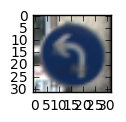

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import tensorflow as tf

#X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Since no validation data set was provided for the training to test again, I have split the training set to 80%-20% rule. I did split the train data so that I could later measure the accuracy of the network against.

This will provide me an opportunity to debug the network with while keeping the test hidden for the final use.

In [5]:
def showImage(index, train_set, label_set):
    index = random.randint(0, len(train_set))
    image = train_set[index].squeeze()

    plt.figure(figsize=(1,1))
    plt.imshow(image)
    print(label_set[index])

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

# split the training data into training data + validation data
Xt, Xv = train_test_split(X_train, test_size=0.2, random_state=0)
Yt, Yv = train_test_split(y_train, test_size=0.2, random_state=0)

print(len(Xt))
print(len(Xv))
print(len(Yt))
print(len(Yv))

31367
7842
31367
7842


3
32
1
35
11


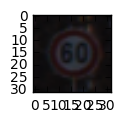

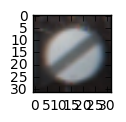

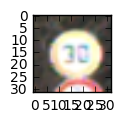

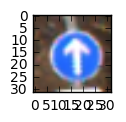

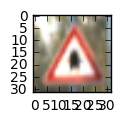

In [7]:
for i in range(len(Xt)):
    if i < 5: showImage(i, Xt, Yt)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Since no data has been provide for validation I split the training set itself into training set and validation set. This will provide me with opportunity to test the accuracy of the network with validation before running the final flow on test data.

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Hyperparameters
    mu = 0
    sigma = 1 / np.sqrt(200)
    print(sigma)
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x128.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 128), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(128))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x128. Output = 14x14x128.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x108.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 128, 128), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(128))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x128. Output = 5x5x128.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(5*5*128, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 1024. Output = 256.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 256), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(256))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout on output from 2nd fully-connected layer
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 256. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(256, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
    
    

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final architecture look like following:

Input

Conv Layer 1 - 32x32x3 => 28x28x128, RELU => 14x14x128

Con Layer 2 - 14x14x128 => 10x10x108, RELU => 5x5x108

Fully Connected Layer 1 - 5x5x108, RELU => 1024

Fully Connected Layer 2 - 1024 => 256

Softmax Layer - 256 => 43 (Output)


In [9]:
x = tf.placeholder(tf.float32, (None, 32,32,3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)

# Since normal doing one-hot encoding was crashing on windows so I have used the below
# route to create one hot encoding
num_labels = 43
sparse_labels = tf.reshape(y, [-1, 1])
derived_size = tf.shape(sparse_labels)[0]
indices = tf.reshape(tf.range(0, derived_size, 1), [-1, 1])
concated = tf.concat(1, [indices, sparse_labels])
outshape = tf.concat(0, [tf.reshape(derived_size, [1]), tf.reshape(num_labels, [1])])
one_hot_y = tf.sparse_to_dense(concated, outshape, 1.0, 0.0)

In [10]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

0.0707106781187


In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        total_accuracy += (accuracy * len(batch_x))
        print('accuracy {}'.format(accuracy))
    return total_accuracy / num_examples

In [12]:
### Train your model here.
### Feel free to use as many code cells as needed.

EPOCHS = 150
BATCH_SIZE = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(Xt)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(Xt, Yt)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(Xv, Yv)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()
    saver.save(sess, 'lenet/')
    print("Model saved")

Training...

accuracy 0.19999998807907104
accuracy 0.26999998092651367
accuracy 0.16999998688697815
accuracy 0.26999998092651367
accuracy 0.22999998927116394
accuracy 0.2199999839067459
accuracy 0.2199999988079071
accuracy 0.17999999225139618
accuracy 0.2199999988079071
accuracy 0.14999999105930328
accuracy 0.20999999344348907
accuracy 0.2199999988079071
accuracy 0.25999999046325684
accuracy 0.25
accuracy 0.2199999988079071
accuracy 0.2800000011920929
accuracy 0.22999998927116394
accuracy 0.25999999046325684
accuracy 0.20999999344348907
accuracy 0.25999999046325684
accuracy 0.26999998092651367
accuracy 0.2800000011920929
accuracy 0.18999998271465302
accuracy 0.23999999463558197
accuracy 0.20999999344348907
accuracy 0.24000000953674316
accuracy 0.19999998807907104
accuracy 0.2799999713897705
accuracy 0.2799999713897705
accuracy 0.20999999344348907
accuracy 0.2600000202655792
accuracy 0.19999998807907104
accuracy 0.25
accuracy 0.2199999988079071
accuracy 0.17999999225139618
accuracy 0.25

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**



For training and evaluating the model I have split the training data set into 80% training and 20% validation data.

I have used the RELU as optimizer and kept the hyper parameters as follows:

EPOHS = 150

STDDDEV = SIGMA = 1 / np.sqrt(<no of training image samples>), this makes the gaussian_normal to spread over very less area. This makes the result from the network more better results in comparison to 0.1 and should also help in reducing overfitting.

Patch Size = (5x5)

Learning rate = 0.001

Dropout = 0.5

Actual stats of the neuron is mentioned earlier in this same building.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**


At first i tried to implement the letNet Lab learning as it is. But shuffling the data was causing the labels to shuffle and the result produced was very bad. Also, since I am not that strong with Python, augmenting the training data with fake data was not proving to be easy. So, I focused my solution on using the unprocessed color images and testing what accuracy can be achieved by changing only the architure.


First thing i did was increase the no of feature for first con layer to 256. that changed the result to worse, to reduced it to 128 and that was giving better result. 

For the fully connected layer I have read in many papers that people using more than 1000 neurons in the layer were getting better results so i then created the following architechture to test for the given problem.

Conv Layer 1 => 128 neurons

Conv Layer 2 => 128 neurons

Fully Connected Layer => 1024

Fully Connected Layer 2 => 256



Reason for fully connected layer 2 to have more than 200 value came from the fact that since the labels have increased to 43 now, having an output from 84 might now be sufficient. I wanted to have FC2 layer alteast 4-5 times more neurons than the labels.

Given the accuracy of around 96-98% on on validation data and 91% for test without preprocessing the data much was kind of another learning experience for me.




---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(32, 32, 3)


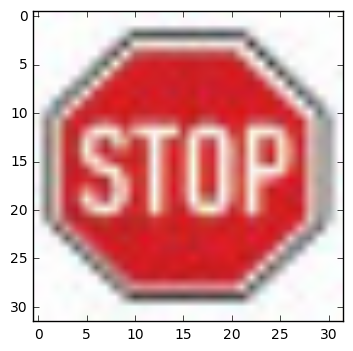

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Loading the data downloaded from internet
import matplotlib.image as mpimg

stop_img = mpimg.imread('stop.jpg')
turnleft_img = mpimg.imread('turnleft.jpg')
turnright_img = mpimg.imread('turnright.jpg')
pedestrains_img = mpimg.imread('pedestrains.jpg')
roadwork_img = mpimg.imread('roadwork.jpg')
plt.imshow(stop_img)
print(stop_img.shape)

(32, 32, 3)


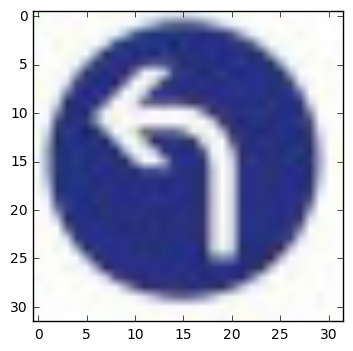

In [14]:
plt.imshow(turnleft_img)
print(turnleft_img.shape)

(32, 32, 3)


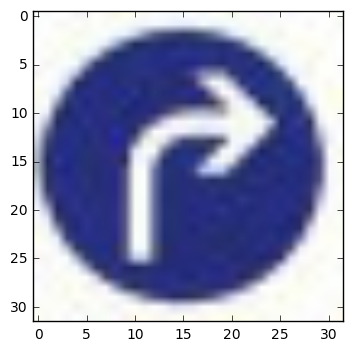

In [15]:
plt.imshow(turnright_img)
print(turnright_img.shape)

(32, 32, 3)


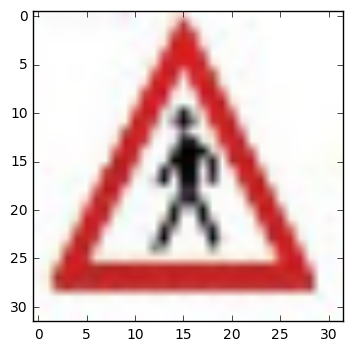

In [16]:
plt.imshow(pedestrains_img)
print(pedestrains_img.shape)

(32, 32, 3)


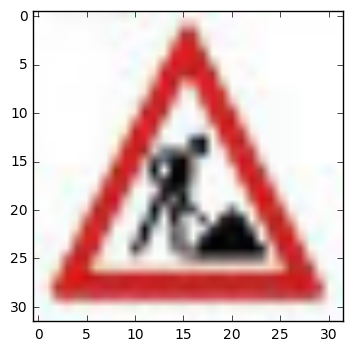

In [17]:
plt.imshow(roadwork_img)
print(roadwork_img.shape)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [18]:
print(type(X_test))
print(y_test)
print(type(y_test))

<class 'numpy.ndarray'>
[16  1 38 ...,  6  7 10]
<class 'numpy.ndarray'>


In [19]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
X_test2 = np.array([stop_img, turnleft_img, turnright_img, pedestrains_img, roadwork_img])
y_test2 = np.array([14, 34, 33, 27, 25])
print(type(X_test2))
print(type(y_test2))
print(y_test2)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[14 34 33 27 25]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model underperformed for the new web images. For test the accuracy was ~91% but for new data the accuracy droped to 80%. This may because fo the reason the there may not be enough images for these signs in the database. By adding more test images through slight rotation, translation or skewing the current ones we might well be able to increase the accuracy back to >90%

In [20]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, 'lenet/')
    test_accuracy_new = evaluate(X_test2, y_test2)
    print("Test Accuracy = {:.3f}".format(test_accuracy_new))

accuracy 1.0
Test Accuracy = 1.000


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [21]:
print(logits)

Tensor("add_4:0", shape=(?, 43), dtype=float32)


In [22]:
print(y_test2)
print(X_test2.shape)
with tf.Session() as sess:
    saver.restore(sess, 'lenet/')
    #logits2 = LeNet(X_test2)
    print(logits)
    softmax = tf.nn.softmax(logits)
    output = sess.run(softmax,feed_dict={x: X_test2, y: y_test2, keep_prob:0.5})
    print(sess.run(tf.nn.top_k(output, k=5)))

[14 34 33 27 25]
(5, 32, 32, 3)
Tensor("add_4:0", shape=(?, 43), dtype=float32)
TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[14,  0,  1,  2,  3],
       [34,  0,  1,  2,  3],
       [33,  0,  1,  2,  3],
       [27,  0,  1,  2,  3],
       [25,  0,  1,  2,  3]]))
